# AdaBoost vs Decision Tree Classifier on Digits Dataset

This notebook compares the performance of a basic Decision Tree and an AdaBoost Classifier (with decision tree stumps) on the `digits` dataset from `sklearn`.

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Load the digits dataset (10 classes: 0–9)
data = load_digits()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=1, random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

In [10]:
# AdaBoost with Decision Tree base
ab = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ab.fit(X_train, y_train)
ab_preds = ab.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [12]:
# Evaluation for Decision Tree
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))

=== Decision Tree ===
Accuracy: 0.18703703703703703
Confusion Matrix:
 [[51  2  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 1 46  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0  0  0  0]
 [ 9 57  0  0  0  0  0  0  0  0]
 [ 1 52  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [18 41  0  0  0  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.96      0.77        53
           1       0.11      1.00      0.20        50
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        66
           6       0.00      0.00      0.00        53
           7       0.00      0.00      0.00        55
           8       0.00      0.00      0.00        43
           9       0.00      0.00

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Evaluation for AdaBoost
print("\n=== AdaBoost ===")
print("Accuracy:", accuracy_score(y_test, ab_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, ab_preds))
print("Classification Report:\n", classification_report(y_test, ab_preds))


=== AdaBoost ===
Accuracy: 0.34074074074074073
Confusion Matrix:
 [[48  0  0  0  2  0  0  0  0  3]
 [ 0  0  0  0  1  0 15  0 34  0]
 [ 0  0  0  0  0  5  9  0 31  2]
 [ 0  0  0  0  0  0  4  0 48  2]
 [ 0  0  0  0  3  2 11  0 44  0]
 [ 1  0  0  0  0 13 44  0  2  6]
 [ 0  0  0  0  0  4 48  0  0  1]
 [ 0  0  0  0  0  0  2  0 53  0]
 [ 0  0  0  0  0  0  0  0 42  1]
 [ 0  0  0  0  0  0  0  0 29 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        54
           4       0.50      0.05      0.09        60
           5       0.54      0.20      0.29        66
           6       0.36      0.91      0.52        53
           7       0.00      0.00      0.00        55
           8       0.15      0.98      0.26        43
           9       0.67      0.51    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


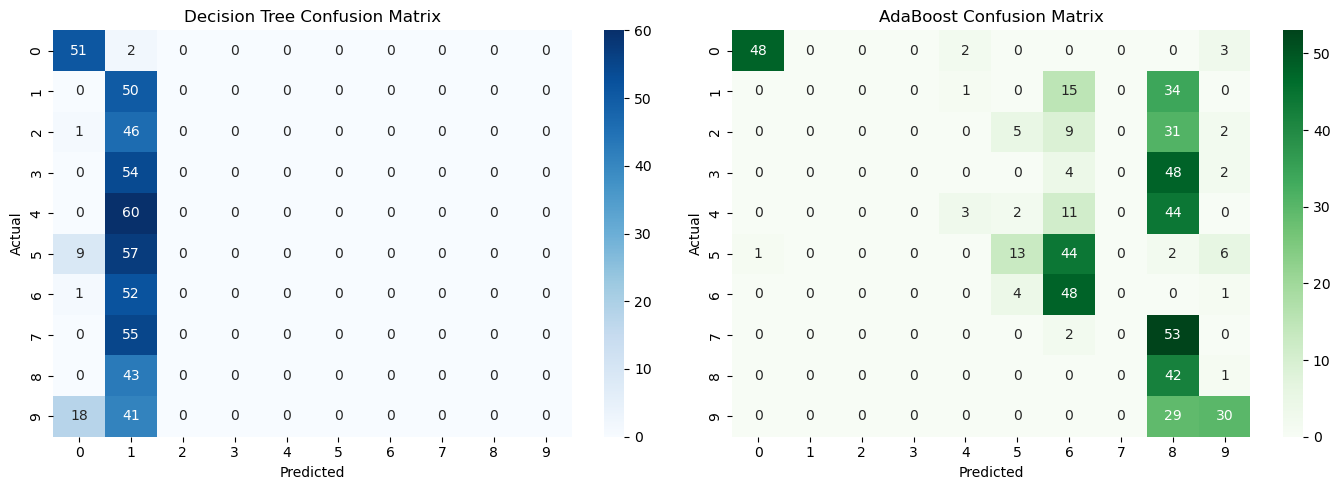

In [16]:
# Visual comparison of confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, ab_preds), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("AdaBoost Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()